# Exercise 8

Name: B.S.V.W. Munasinghe

Index Number: 190397E

In [2]:
#Importing Libraries
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt
import cv2 as cv
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

# 1)

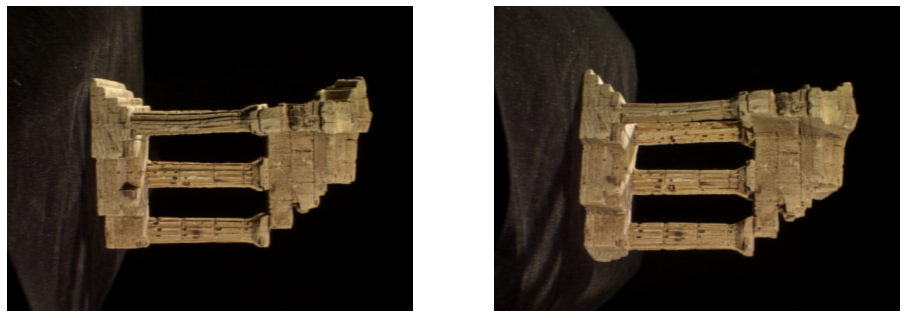

In [11]:
f = open(r'templeSparseRing/templeSR_par.txt','r')
assert f is not None

n = int(f.readline())

#Read the information of the first image
l = f.readline().split()
im1_fn = l[0]

K1 = np.array([float(i) for i in l[1:10]]).reshape((3,3))
R1 = np.array([float(i) for i in l[10:19]]).reshape((3,3))
t1 = np.array([float(i) for i in l[19:22]]).reshape((3,1))

#Read the information of the second image
l = f.readline().split()
im2_fn = l[0]

K2 = np.array([float(i) for i in l[1:10]]).reshape((3,3))
R2 = np.array([float(i) for i in l[10:19]]).reshape((3,3))
t2 = np.array([float(i) for i in l[19:22]]).reshape((3,1))

#Read the two images and show
img1 = cv.imread('templeSparseRing/templeSR0001.png',cv.IMREAD_COLOR) 
assert img1 is not None
img2 = cv.imread('templeSparseRing/templeSR0002.png',cv.IMREAD_COLOR) 
assert img1 is not None

fig,ax = plt.subplots(1,2,figsize=(16,16))
i1 = cv.cvtColor(img1,cv.COLOR_BGR2RGB)
i2 = cv.cvtColor(img2,cv.COLOR_BGR2RGB)
ax[0].axis('off')
ax[1].axis('off')
ax[0].imshow(i1)
ax[1].imshow(i2)

# 2)

In [17]:
P1 = K1 @ np.hstack((R1,t1)) #P = K*[R|t]
P2 = K2 @ np.hstack((R2,t2)) #P = K*[R|t]

print("P1: \n",P1)
print("P2: \n",P2)

P1: 
 [[ 4.80251845e+01  1.44011271e+03 -5.71648932e+02  7.53293366e+01]
 [ 1.53577034e+03 -6.41434324e+01 -1.63127843e+02  1.85810055e+02]
 [ 4.88387837e-02 -1.81568392e-01 -9.82164799e-01  6.14604846e-01]]
P2: 
 [[-1.55882371e+02  1.44377186e+03 -5.42436214e+02  6.81806220e+01]
 [ 1.34928131e+03 -8.41979541e+01 -7.49443961e+02  1.99929996e+02]
 [-3.40999743e-01 -1.74474039e-01 -9.23730472e-01  6.00850565e-01]]


# 3)

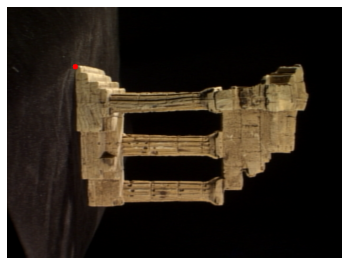

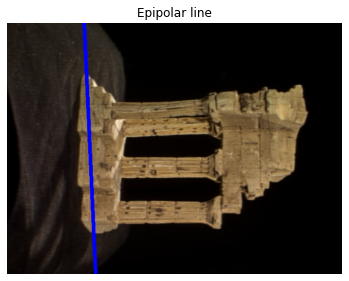

In [27]:
from scipy.linalg import null_space
def skew(x):
    x = x.ravel()
    return np.array([[0,-x[2],x[1]],[x[2],0,-x[0]],[-x[1],x[0],0]])

c = null_space(P1)
c = c*np.sign(c[0,0])
e2 = P2@c
e2x = skew(e2)

F = e2x @ P2 @ np.linalg.pinv(P1)

x = np.array([130,115,1])

cv.circle(img1,(x[0],x[1]),5,(0,0,255),-1)

fig,ax = plt.subplots(figsize=(6,6))
i1 = cv.cvtColor(img1,cv.COLOR_BGR2RGB)
ax.axis('off')
ax.imshow(i1)

l2 = F@x.T

p1 = np.array([0,(l2[0]*0 + l2[2])/l2[1]]).astype(int)
p2 = np.array([500,(l2[0]*500+l2[2])/l2[1]]).astype(int)

cv.line(img2,(p1[0],p1[1]),(p2[0],p2[1]),(255,0,0),5)

fig,ax = plt.subplots(figsize=(6,6))
i1 = cv.cvtColor(img2,cv.COLOR_BGR2RGB)
ax.axis('off')
ax.set_title("Epipolar line")
ax.imshow(i1)

# 4)

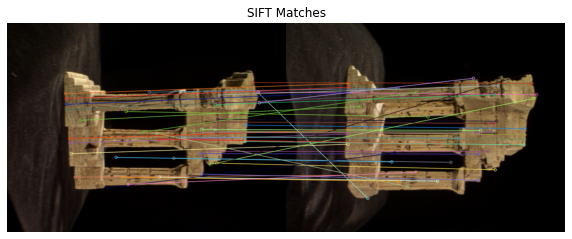

(<matplotlib.image.AxesImage at 0x25bf6a75b40>, None)

In [9]:
# read images
img1 = cv.imread('templeSparseRing/templeSR0001.png',cv.IMREAD_COLOR) 
assert img1 is not None
img2 = cv.imread('templeSparseRing/templeSR0002.png',cv.IMREAD_COLOR) 
assert img2 is not None

#sift
sift = cv.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

#feature matching
bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

fig,ax=plt.subplots(figsize=(10,10))
ax.axis('off')
ax.set_title("SIFT Matches")
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
img3 = cv.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.imshow(img3),plt.show()



Code written refering to an online source

In [34]:
img1 = cv.imread('templeSparseRing/templeSR0001.png',0) 
assert img1 is not None
img2 = cv.imread('templeSparseRing/templeSR0002.png',0) 
assert img2 is not None
sift = cv.SIFT_create()
keyPointsLeft, descriptorsLeft = sift.detectAndCompute(img1,None)
  
keyPointsRight, descriptorsRight = sift.detectAndCompute(img2,None)
   
# Create FLANN matcher object
FLANN_INDEX_KDTREE = 0
indexParams = dict(algorithm=FLANN_INDEX_KDTREE,trees=5)
searchParams = dict(checks=50)
flann = cv.FlannBasedMatcher(indexParams,searchParams)
matches = flann.knnMatch(descriptorsLeft,descriptorsRight,k=2)

# Apply ratio test
ptsLeft = []
ptsRight = []
   
for m,n in matches:
      
    if m.distance < 0.8 * n.distance:
        ptsLeft.append(keyPointsLeft[m.trainIdx].pt)
        ptsRight.append(keyPointsRight[n.trainIdx].pt)

In [35]:
ptsLeft = np.int32(ptsLeft)
ptsRight = np.int32(ptsRight)
F, mask = cv.findFundamentalMat(ptsLeft, ptsRight,cv.FM_LMEDS)
  
# We select only inlier points
ptsLeft = ptsLeft[mask.ravel() == 1]
ptsRight = ptsRight[mask.ravel() == 1]

In [38]:
def drawlines(img1, img2, lines, pts1, pts2):
    
    r,c = img1.shape[0],img1.shape[1]
    img1 = cv.cvtColor(img1, cv.COLOR_GRAY2BGR)
    img2 = cv.cvtColor(img2, cv.COLOR_GRAY2BGR)
      
    for r, pt1, pt2 in zip(lines, pts1, pts2):
          
        color = tuple(np.random.randint(0, 255,3).tolist())
          
        x0, y0 = map(int, [0, -r[2] / r[1] ])
        x1, y1 = map(int,[c, -(r[2] + r[0] * c) / r[1] ])
          
        img1 = cv.line(img1,(x0, y0), (x1, y1), color, 1)
        img1 = cv.circle(img1,tuple(pt1), 5, color, -1)
        img2 = cv.circle(img2,tuple(pt2), 5, color, -1)
    return img1, img2

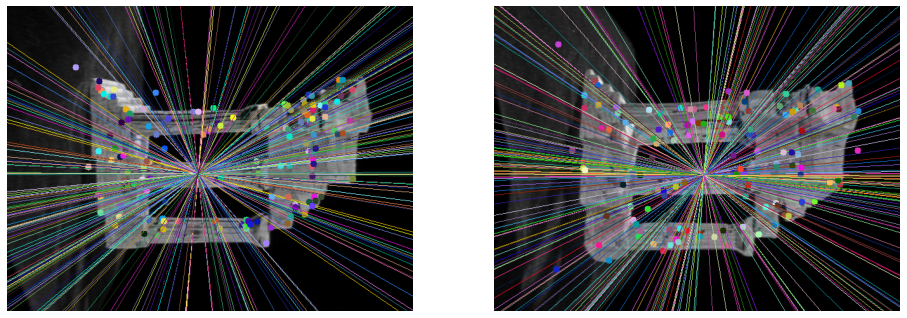

In [49]:
lines1 = cv.computeCorrespondEpilines(ptsRight.reshape(-1,1,2), 2,F)
lines1 = lines1.reshape(-1,3)
(img5,img6) = drawlines(img1,img2,lines1,ptsLeft,ptsRight)
# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv.computeCorrespondEpilines(ptsLeft.reshape(-1,1,2), 1,F)
lines2 = lines2.reshape(-1,3)
img3,img4 = drawlines(img2,img1,lines2,ptsRight,ptsLeft)

fig,ax = plt.subplots(1,2,figsize=(16,16))
ax[0].axis('off')
ax[1].axis('off')
plt.subplot(121),plt.imshow(img5)
plt.subplot(122),plt.imshow(img3)
plt.show()